<a href="https://colab.research.google.com/github/alkur-gh/finger-counter/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import cv2

In [2]:
img_height, img_width = 224, 224
batch_size = 128
ncategories = 6

In [3]:
conv_model = keras.applications.MobileNetV2(
  # alpha=0.2,
  weights=None,
  include_top=True,
  classes=ncategories,
  input_shape=(img_height, img_width, 3),
)
# pretrained_model.trainable = False
model = keras.Sequential([
  conv_model,
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model  = keras.Sequential([
  keras.applications.MobileNetV2(
      alpha=0.25,
      weights=None,
      include_top=False,
      input_shape=(img_height, img_width, 3),
  ),
  keras.layers.Flatten(),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(6, activation='relu'),
  keras.layers.Dense(6, activation='relu'),
  keras.layers.Dense(ncategories, activation='softmax'),
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [4]:
data_path = '/content/drive/MyDrive/mldata/data.npz'
loaded = np.load(data_path)
Xtrain, ytrain, Xtest, ytest = loaded['arr_0'], loaded['arr_1'], loaded['arr_2'], loaded['arr_3']

In [5]:
Xtrain.shape

(2000, 224, 224, 3)

In [6]:
ytrain.sum(axis=0), ytest.sum(axis=0)

(array([369., 329., 323., 344., 333., 302.], dtype=float32),
 array([97., 83., 74., 81., 80., 85.], dtype=float32))

In [17]:
history = model.fit(Xtrain, ytrain, validation_data=(Xtest, ytest), epochs=5)

Epoch 1/5
63/63 [==============================] - 120s 2s/step - loss: 2.0446 - accuracy: 0.3290 - val_loss: 1.7916 - val_accuracy: 0.1600
Epoch 2/5
63/63 [==============================] - 114s 2s/step - loss: 1.3360 - accuracy: 0.5030 - val_loss: 1.7948 - val_accuracy: 0.1700
Epoch 3/5
63/63 [==============================] - 114s 2s/step - loss: 1.0776 - accuracy: 0.6210 - val_loss: 1.7996 - val_accuracy: 0.1600
Epoch 4/5
63/63 [==============================] - 114s 2s/step - loss: 0.9444 - accuracy: 0.6825 - val_loss: 1.8065 - val_accuracy: 0.1600
Epoch 5/5
63/63 [==============================] - 114s 2s/step - loss: 0.7511 - accuracy: 0.7510 - val_loss: 1.8154 - val_accuracy: 0.1600


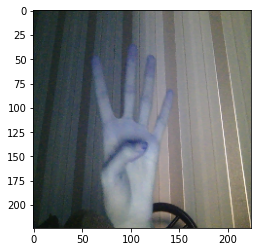

array([[0.15016785, 0.33913812, 0.19432604, 0.1211381 , 0.09745351,
        0.09777636]], dtype=float32)

In [15]:
img = cv2.resize(cv2.imread('/content/drive/MyDrive/mldata/myhand_4.png', 1), (img_width, img_height))
plt.imshow(img)
plt.show()
model.predict(np.expand_dims(img, axis=0))

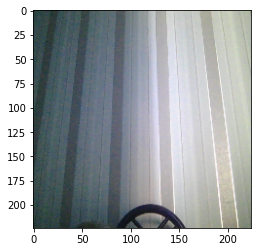

array([[0.15016787, 0.33913812, 0.19432607, 0.12113811, 0.09745352,
        0.09777636]], dtype=float32)

In [16]:
img = cv2.resize(cv2.imread('/content/drive/MyDrive/mldata/background.png', 1), (img_width, img_height))
plt.imshow(img)
plt.show()
model.predict(np.expand_dims(img, axis=0))